In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [3]:
#Read in the European weather data.
climate = pd.read_csv(r"~/Data Sets/Dataset_wide_scaled.csv", index_col=0)
climate

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1           0.660514          -0.02793        0.826097   
1      19600102      1           0.244897          -0.02793        0.735760   
2      19600103      1           1.076130          -0.02793        1.277781   
3      19600104      1          -1.001953          -0.02793        1.458455   
4      19600105      1           0.244897          -0.02793        1.729466   
...         ...    ...                ...               ...             ...   
22945  20221027     10          -1.833187          -0.02793        0.284075   
22946  20221028     10           0.244897          -0.02793        0.103401   
22947  20221029     10          -0.586336          -0.02793        0.013064   
22948  20221030     10          -0.170720          -0.02793        0.374412   
22949  20221031     10          -0.170720          -0.02793        0.735760   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           -0.001949               -1.101066            -0.265148   
1           -0.001949               -1.058108             1.658760   
2           -0.001949               -1.251420             0.155707   
3           -0.001949               -0.821838            -0.445514   
4           -0.001949               -0.746661            -0.164944   
...               ...                     ...                  ...   
22945        1.037367               -0.005632            -0.004619   
22946        0.976231               -0.005632            -0.004619   
22947        0.716402               -0.005632            -0.004619   
22948        0.487141               -0.005632            -0.004619   
22949        0.196744               -0.005632            -0.004619   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0             -0.179228       -0.902918  ...             -0.443701   
1             -0.179228       -0.810126  ...              0.783085   
2             -0.179228       -1.065304  ...              0.783085   
3             -0.179228       -0.114186  ...              0.783085   
4             -0.179228        0.187388  ...             -1.670486   
...                 ...             ...  ...                   ...   
22945         -0.179228        0.720943  ...             -0.443701   
22946         -0.179228        0.187388  ...             -0.443701   
22947         -0.179228        0.349774  ...             -0.443701   
22948         -0.179228        0.280180  ...             -0.443701   
22949         -0.179228       -0.322968  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...   

In [4]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [5]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

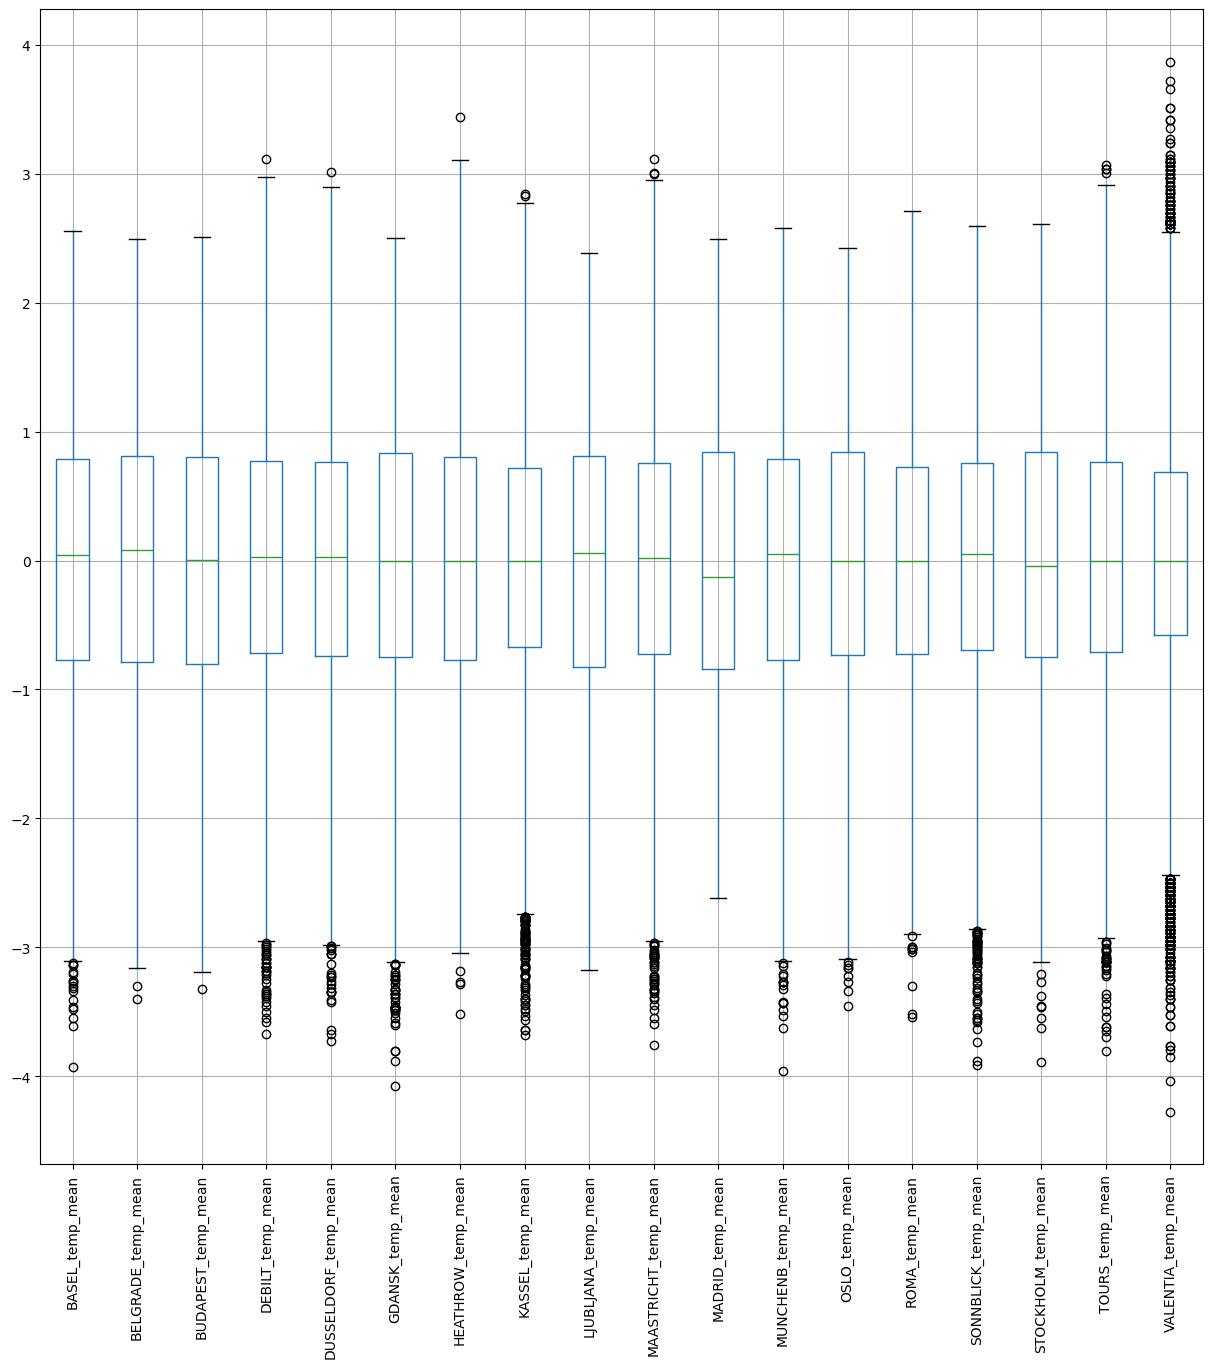

In [7]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

In [11]:
df1969 = df[(df['DATE']>=19690101) & (df['DATE']<19700101)]

In [80]:
df1994 = df[(df['DATE']>=19940101) & (df['DATE']<19950101)]

In [81]:
df2019 = df[(df['DATE']>=20190101) & (df['DATE']<20200101)]

In [21]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

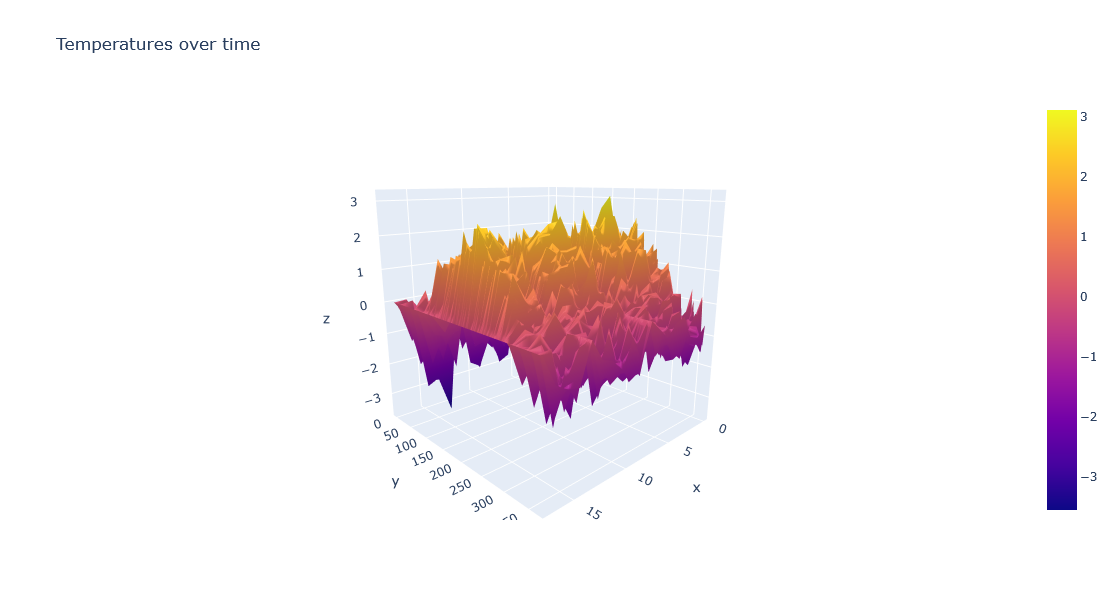

In [22]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [43]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [256]:
def prepare_existing_data(df, temp_col='BUDAPEST_temp_mean'):
    """Use existing transformation method"""
    n_rows = df.shape[0]
    i = np.arange(0.01, 3.66, 0.01)[:n_rows]  # Transformed index
    X = np.column_stack([np.ones(n_rows), i])  # [1, transformed_index]
    y = df[temp_col].to_numpy().reshape(-1, 1)
    return X, y, i

In [162]:
def compute_cost_sine_fixed(X, y, theta=np.array([[0],[0],[0]]), theta2_fixed=2*np.pi/3.65):
    """Compute loss for sine wave with fixed frequency: y = θ₀ + θ₁*sin(θ₂_fixed*x + θ₃)"""
    
    m = len(y)
    theta = theta.reshape(3,1)
    
    # Calculate hypothesis with fixed θ₂
    x_vals = X[:, 1].reshape(-1, 1)
    h_x = theta[0] + theta[1] * np.sin(theta2_fixed * x_vals + theta[2])
    
    # Calculate squared error
    error_term = np.sum((h_x - y)**2)
    loss = error_term / (2*m)
    
    return loss

In [196]:
def gradient_descent_sine_fixed(X, y, theta=np.array([[10],[10],[-1.8]]),
                               theta2_fixed=2*np.pi/3.65, alpha=0.001, num_iterations=5000):
    """
    Gradient descent for sine wave with FIXED frequency: y = θ₀ + θ₁*sin(θ₂_fixed*x + θ₃)
    Only optimizes: θ₀ (offset), θ₁ (amplitude), θ₃ (phase)
    θ₂ is fixed at 2π/3.65 for exactly one cycle over the data range
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta3_history = []
    theta = theta.reshape(3,1)
    
    x_vals = X[:, 1].reshape(-1, 1)
    
    for i in range(num_iterations):
        # Forward pass with fixed θ₂
        sin_term = np.sin(theta2_fixed * x_vals + theta[2])
        cos_term = np.cos(theta2_fixed * x_vals + theta[2])
        h_x = theta[0] + theta[1] * sin_term
        
        # Calculate error
        error = h_x - y
        
        # Compute gradients (no gradient for θ₂ since it's fixed)
        dJ_dtheta0 = (1/m) * np.sum(error)                              # ∂J/∂θ₀
        dJ_dtheta1 = (1/m) * np.sum(error * sin_term)                   # ∂J/∂θ₁
        dJ_dtheta3 = (1/m) * np.sum(error * theta[1] * cos_term)        # ∂J/∂θ₃
        
        # Update only the non-fixed parameters (extract scalars explicitly)
        theta[0] -= alpha * float(dJ_dtheta0)
        theta[1] -= alpha * float(dJ_dtheta1)
        theta[2] -= alpha * float(dJ_dtheta3)
        
        # Store history (extract scalars explicitly)
        theta0_history.append(theta[0].item())
        theta1_history.append(theta[1].item())
        theta3_history.append(theta[2].item())
        J_history.append(compute_cost_sine_fixed(X, y, theta, theta2_fixed).item())
        
    return (theta, theta2_fixed, J_history, theta0_history, theta1_history, theta3_history)

In [237]:
years = [1969, 1994, 2019]
dataframes = [df1969, df1994, df2019]
data = [prepare_existing_data(df, temp_col='BUDAPEST_temp_mean') for df in dataframes]

# Fixed frequency for exactly one cycle over the year
FIXED_FREQUENCY = 2 * np.pi / 3.65
print(f"Fixed frequency θ₂ = {FIXED_FREQUENCY:.3f}")

params = []
for X, y, index_vals in data:
    print(f"Fitting sine wave (fixed freq) to {len(y)} data points...")
    
    # Only optimize θ₀, θ₁, θ₃ (offset, amplitude, phase)
    theta_final, theta2_fixed, J_history, theta0_history, theta1_history, theta3_history, *_ = gradient_descent_sine_fixed(
        X, y, 
        np.array([[0], [1], [-1.8]]),  # [offset, amplitude, phase]
        theta2_fixed=FIXED_FREQUENCY,
        alpha=0.01, 
        num_iterations=1000
    )
    params.append((theta_final, theta2_fixed, J_history, theta0_history, theta1_history, theta3_history))

Fixed frequency θ₂ = 1.721
Fitting sine wave (fixed freq) to 365 data points...
Fitting sine wave (fixed freq) to 365 data points...
Fitting sine wave (fixed freq) to 365 data points...


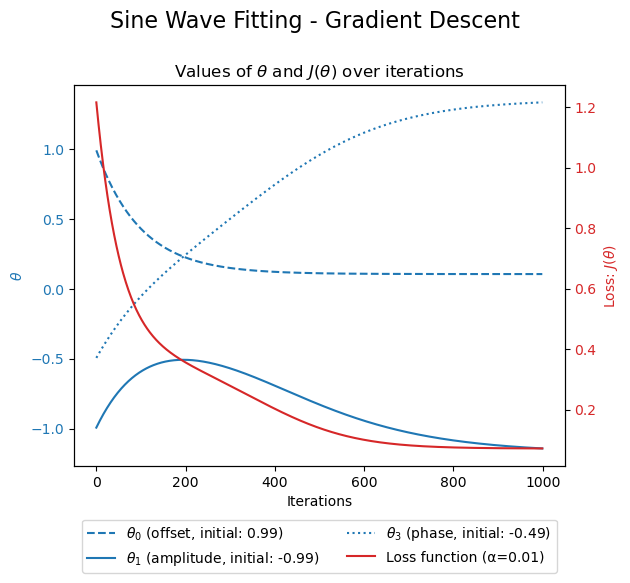

In [284]:
# Unpack the gradient descent results
theta_final, theta2_fixed, J_history, theta0_history, theta1_history, theta3_history = gradient_descent_sine_fixed(
    X, y, 
    np.array([[1.0], [-1], [-.5]]),  # [offset, amplitude, phase]
    theta2_fixed=FIXED_FREQUENCY,
    alpha=0.01, 
    num_iterations=1000
)

# Plot the gradient descent results for sine wave fitting
fig, ax1 = plt.subplots()
fig.suptitle('Sine Wave Fitting - Gradient Descent', y=1, fontsize=16)

# Create custom legend labels with initial values
theta0_label = f'$\\theta_{{0}}$ (offset, initial: {theta0_history[0]:.2f})'
theta1_label = f'$\\theta_{{1}}$ (amplitude, initial: {theta1_history[0]:.2f})'
theta3_label = f'$\\theta_{{3}}$ (phase, initial: {theta3_history[0]:.2f})'
loss_label = f'Loss function (α=0.01)'

# Plot theta parameters over time
color='tab:blue'
ax1.plot(theta0_history, label=theta0_label, linestyle='--', color=color)
ax1.plot(theta1_history, label=theta1_label, linestyle='-', color=color)
ax1.plot(theta3_history, label=theta3_label, linestyle=':', color=color)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('$\\theta$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label=loss_label, color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add legend below the chart in a 2x2 grid layout
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
       
# Create legend with 2 columns (2x2 grid layout)
plt.legend(lines1 + lines2, labels1 + labels2, 
                 loc='lower center', bbox_to_anchor=(0.5, -0.3), 
                 ncol=2, fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.05)  # Make room for the legend below
#plt.savefig('sine_wave_gradient_descent.png', bbox_inches='tight')

Fitting sine wave (fixed freq) to BUDAPEST 1969 - 365 data points...
Fitting sine wave (fixed freq) to BUDAPEST 1994 - 365 data points...
Fitting sine wave (fixed freq) to BUDAPEST 2019 - 365 data points...
Fitting sine wave (fixed freq) to MADRID 1969 - 365 data points...
Fitting sine wave (fixed freq) to MADRID 1994 - 365 data points...
Fitting sine wave (fixed freq) to MADRID 2019 - 365 data points...
Fitting sine wave (fixed freq) to OSLO 1969 - 365 data points...
Fitting sine wave (fixed freq) to OSLO 1994 - 365 data points...
Fitting sine wave (fixed freq) to OSLO 2019 - 365 data points...


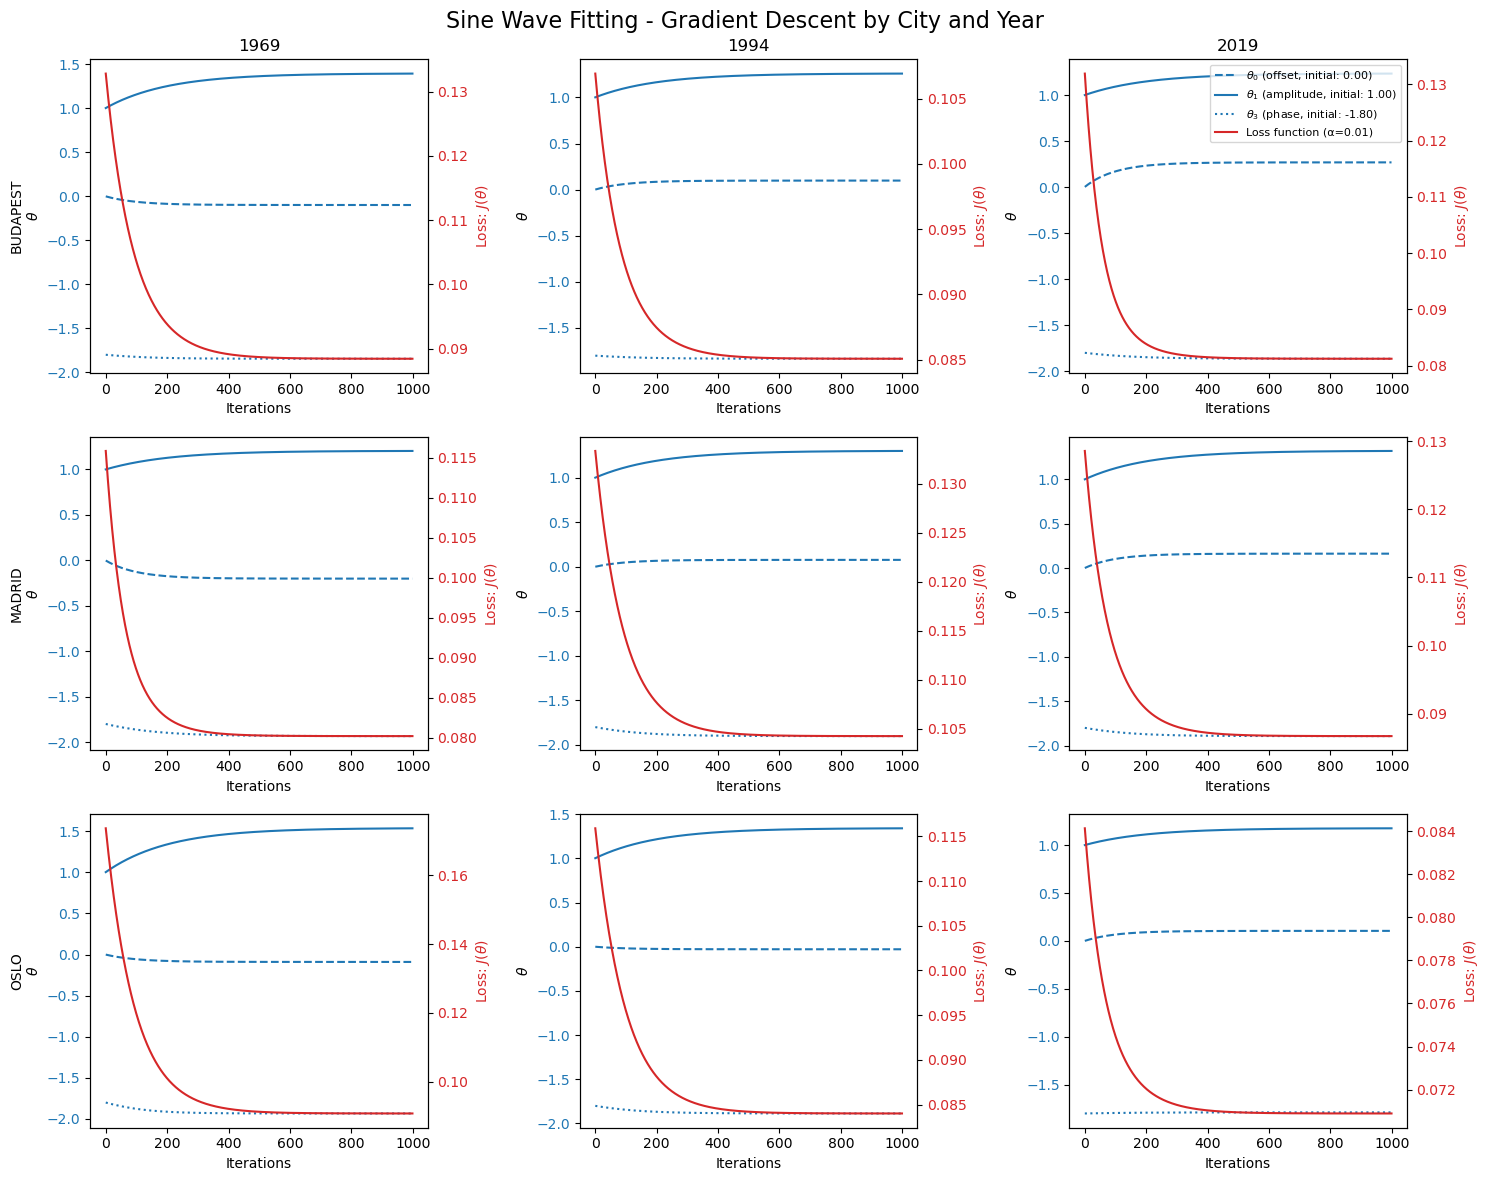

In [240]:
# Extract dataframes for each city from the combined dataframes
cities = ['BUDAPEST', 'MADRID', 'OSLO']
budapest_dataframes = [df1969, df1994, df2019]  
madrid_dataframes = [df1969, df1994, df2019]   
oslo_dataframes = [df1969, df1994, df2019]

dataframes = [budapest_dataframes, madrid_dataframes, oslo_dataframes]


# Collect results for all cities and years
all_params = []
for city_idx, city in enumerate(cities):
   city_params = []
   for year_idx, df in enumerate(dataframes[city_idx]):
       X, y, index_vals = prepare_existing_data(df, temp_col=f'{city}_temp_mean')
       print(f"Fitting sine wave (fixed freq) to {city} {years[year_idx]} - {len(y)} data points...")
       
       theta_final, theta2_fixed, J_history, theta0_history, theta1_history, theta3_history, *_ = gradient_descent_sine_fixed(
           X, y, 
           np.array([[0], [1], [-1.8]]),  # [offset, amplitude, phase]
           theta2_fixed=FIXED_FREQUENCY,
           alpha=0.01, 
           num_iterations=1000
       )
       city_params.append((theta_final, theta2_fixed, J_history, theta0_history, theta1_history, theta3_history))
   all_params.append(city_params)

# Plot results for all cities and years in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Sine Wave Fitting - Gradient Descent by City and Year', y=0.98, fontsize=16)

for city_idx, city_params in enumerate(all_params):
   for year_idx, (theta_final, theta2_fixed, J_history, theta0_history, theta1_history, theta3_history) in enumerate(city_params):
       ax1 = axes[city_idx, year_idx]
       
       # Set titles
       if city_idx == 0:
           ax1.set_title(f'{years[year_idx]}', fontsize=12)
       if year_idx == 0:
           ax1.set_ylabel(f'{cities[city_idx]}\n$\\theta$', fontsize=10)
       else:
           ax1.set_ylabel('$\\theta$', fontsize=10)
           
       # Create custom legend labels with initial values
       theta0_label = f'$\\theta_{{0}}$ (offset, initial: {theta0_history[0]:.2f})'
       theta1_label = f'$\\theta_{{1}}$ (amplitude, initial: {theta1_history[0]:.2f})'
       theta3_label = f'$\\theta_{{3}}$ (phase, initial: {theta3_history[0]:.2f})'
       loss_label = f'Loss function (α=0.01)'
       
       # Plot theta parameters over time
       color='tab:blue'
       ax1.plot(theta0_history, label=theta0_label, linestyle='--', color=color)
       ax1.plot(theta1_history, label=theta1_label, linestyle='-', color=color)
       ax1.plot(theta3_history, label=theta3_label, linestyle=':', color=color)
       ax1.set_xlabel('Iterations')
       ax1.tick_params(axis='y', labelcolor=color)

       # Plot loss function over time
       color='tab:red'
       ax2 = ax1.twinx()
       ax2.plot(J_history, label=loss_label, color=color)
       ax2.set_ylabel('Loss: $J(\\theta)$', color=color, fontsize=10)
       ax2.tick_params(axis='y', labelcolor=color)

       # Add legend only to the top-right subplot to avoid clutter
       if city_idx == 0 and year_idx == 2:
           lines1, labels1 = ax1.get_legend_handles_labels()
           lines2, labels2 = ax2.get_legend_handles_labels()
           ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=8)

plt.tight_layout()
plt.savefig('sine_wave_gradient_descent_cities_years.png')
plt.show()

Fixed frequency θ₂ = 1.721
Fitting sine wave (fixed freq) to 365 data points...
Final: θ₀=-0.099, θ₁=1.40, θ₂=1.721 (fixed), θ₃=-1.85
Final loss: 0.09
Fitting sine wave (fixed freq) to 365 data points...
Final: θ₀=0.098, θ₁=1.26, θ₂=1.721 (fixed), θ₃=-1.83
Final loss: 0.09
Fitting sine wave (fixed freq) to 365 data points...
Final: θ₀=0.269, θ₁=1.24, θ₂=1.721 (fixed), θ₃=-1.86
Final loss: 0.08


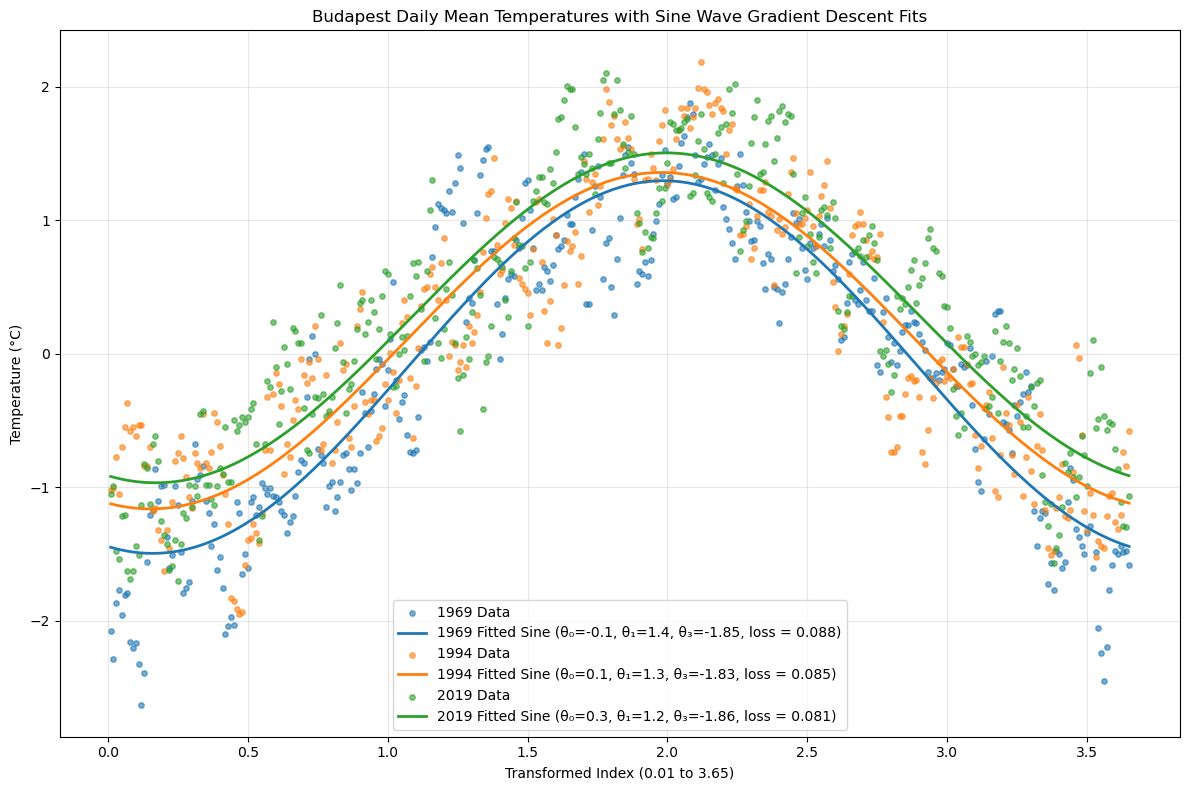


All fits use fixed frequency θ₂ = 1.721 for exactly one cycle


In [222]:
# Run fixed-frequency sine gradient descent
params = []
for X, y, index_vals in data:
    print(f"Fitting sine wave (fixed freq) to {len(y)} data points...")
    
    # Only optimize θ₀, θ₁, θ₃ (offset, amplitude, phase)
    theta, theta2, J_hist, *_ = gradient_descent_sine_fixed(
        X, y, 
        np.array([[0], [1], [-1.8]]),  # [offset, amplitude, phase]
        theta2_fixed=FIXED_FREQUENCY,
        alpha=0.01, 
        num_iterations=5000
    )
    params.append((theta, theta2))
    
    print(f"Final: θ₀={theta[0,0]:.3f}, θ₁={theta[1,0]:.2f}, θ₂={theta2:.3f} (fixed), θ₃={theta[2,0]:.2f}")
    print(f"Final loss: {J_hist[-1]:.2f}")

# Visualization
plt.figure(figsize=(12, 8))

for (X, y, index_vals), (theta, theta2), year, color in zip(data, params, years, colors):
    # Scatter plot
    plt.scatter(index_vals, y.flatten(), alpha=0.6, color=color, s=15, label=f'{year} Data')
    
    # Fitted sine curve with fixed frequency
    y_pred = theta[0] + theta[1] * np.sin(theta2 * index_vals.reshape(-1,1) + theta[2])
    plt.plot(index_vals, y_pred.flatten(), color=color, linewidth=2, 
             label=f'{year} Fitted Sine (θ₀={theta[0,0]:.1f}, θ₁={theta[1,0]:.1f}, θ₃={theta[2,0]:.2f}, loss = {compute_cost_sine_fixed(X, y, theta, theta2_fixed).item():.3f})')

plt.xlabel('Transformed Index (0.01 to 3.65)')
plt.ylabel('Temperature (°C)')
plt.title(f'Budapest Daily Mean Temperatures with Sine Wave Gradient Descent Fits')
plt.legend(loc='lower center')
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig("budapest_sine_wave_gradient_descents.png")
plt.show()

print(f"\nAll fits use fixed frequency θ₂ = {FIXED_FREQUENCY:.3f} for exactly one cycle")

Fixed frequency θ₂ = 1.721
Fitting sine wave (fixed freq) to 365 data points...
Final: θ₀=-0.201, θ₁=1.205, θ₂=1.721 (fixed), θ₃=-1.93
Final loss: 0.080
Fitting sine wave (fixed freq) to 365 data points...
Final: θ₀=0.078, θ₁=1.303, θ₂=1.721 (fixed), θ₃=-1.90
Final loss: 0.104
Fitting sine wave (fixed freq) to 365 data points...
Final: θ₀=0.163, θ₁=1.323, θ₂=1.721 (fixed), θ₃=-1.89
Final loss: 0.087


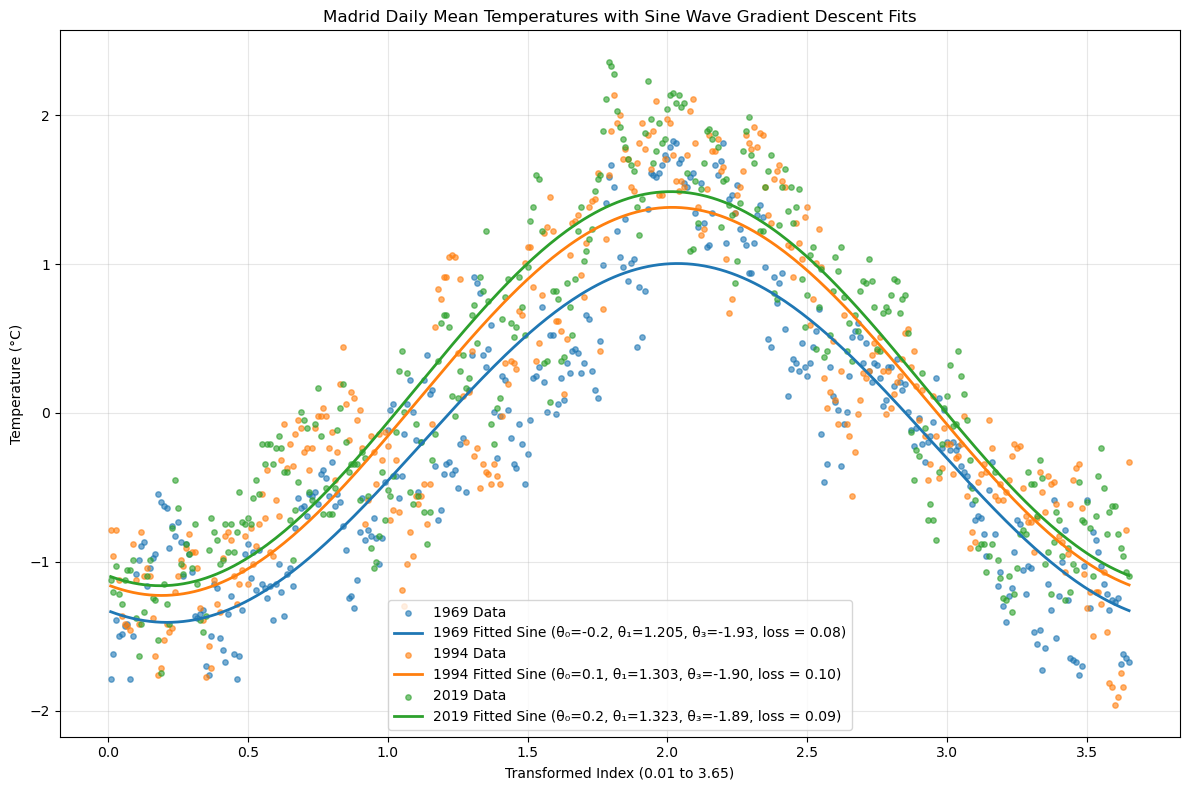


All fits use fixed frequency θ₂ = 1.721 for exactly one cycle


In [285]:
years = [1969, 1994, 2019]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
dataframes = [df1969, df1994, df2019]
data = [prepare_existing_data(df, temp_col='MADRID_temp_mean') for df in dataframes]

# Fixed frequency for exactly one cycle over the year
FIXED_FREQUENCY = 2 * np.pi / 3.65
print(f"Fixed frequency θ₂ = {FIXED_FREQUENCY:.3f}")

# Run fixed-frequency sine gradient descent
params = []
for X, y, index_vals in data:
    print(f"Fitting sine wave (fixed freq) to {len(y)} data points...")
    
    # Only optimize θ₀, θ₁, θ₃ (offset, amplitude, phase)
    theta, theta2, J_hist, *_ = gradient_descent_sine_fixed(
        X, y, 
        np.array([[0], [1], [-1.8]]),  # [offset, amplitude, phase]
        theta2_fixed=FIXED_FREQUENCY,
        alpha=0.01, 
        num_iterations=5000
    )
    params.append((theta, theta2))
    
    print(f"Final: θ₀={theta[0,0]:.3f}, θ₁={theta[1,0]:.3f}, θ₂={theta2:.3f} (fixed), θ₃={theta[2,0]:.2f}")
    print(f"Final loss: {J_hist[-1]:.3f}")

# Visualization
plt.figure(figsize=(12, 8))

for (X, y, index_vals), (theta, theta2), year, color in zip(data, params, years, colors):
    # Scatter plot
    plt.scatter(index_vals, y.flatten(), alpha=0.6, color=color, s=15, label=f'{year} Data')
    
    # Fitted sine curve with fixed frequency
    y_pred = theta[0] + theta[1] * np.sin(theta2 * index_vals.reshape(-1,1) + theta[2])
    plt.plot(index_vals, y_pred.flatten(), color=color, linewidth=2, 
             label=f'{year} Fitted Sine (θ₀={theta[0,0]:.1f}, θ₁={theta[1,0]:.3f}, θ₃={theta[2,0]:.2f}, loss = {compute_cost_sine_fixed(X, y, theta, theta2_fixed).item():.2f})')

plt.xlabel('Transformed Index (0.01 to 3.65)')
plt.ylabel('Temperature (°C)')
plt.title(f'Madrid Daily Mean Temperatures with Sine Wave Gradient Descent Fits')
plt.legend(loc='lower center')
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig("madrid_sine_wave_gradient_descents.png")
plt.show()

print(f"\nAll fits use fixed frequency θ₂ = {FIXED_FREQUENCY:.3f} for exactly one cycle")

Fixed frequency θ₂ = 1.721
Fitting sine wave (fixed freq) to 365 data points...
Final: θ₀=-0.090, θ₁=1.539, θ₂=1.721 (fixed), θ₃=-1.93
Final loss: 0.091
Fitting sine wave (fixed freq) to 365 data points...
Final: θ₀=-0.029, θ₁=1.342, θ₂=1.721 (fixed), θ₃=-1.89
Final loss: 0.084
Fitting sine wave (fixed freq) to 365 data points...
Final: θ₀=0.105, θ₁=1.177, θ₂=1.721 (fixed), θ₃=-1.79
Final loss: 0.071


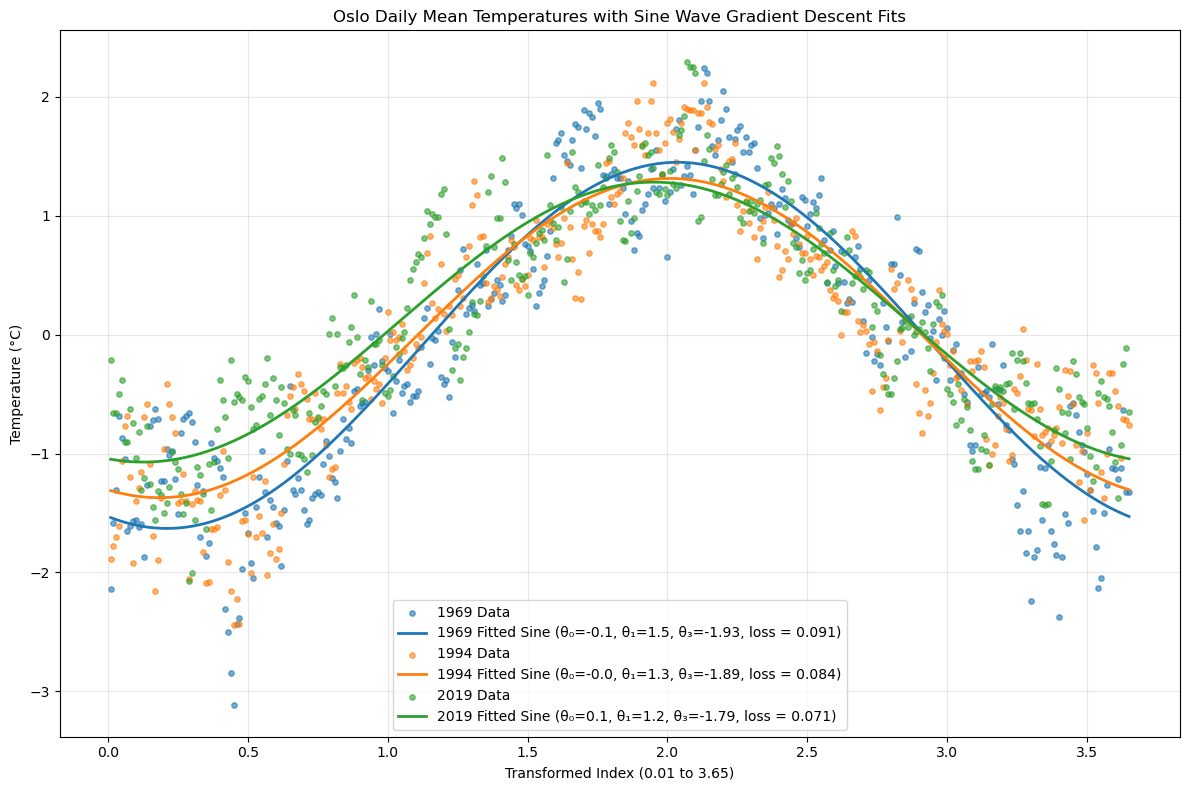


All fits use fixed frequency θ₂ = 1.721 for exactly one cycle


In [286]:
years = [1969, 1994, 2019]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
dataframes = [df1969, df1994, df2019]
data = [prepare_existing_data(df, temp_col='OSLO_temp_mean') for df in dataframes]

# Fixed frequency for exactly one cycle over the year
FIXED_FREQUENCY = 2 * np.pi / 3.65
print(f"Fixed frequency θ₂ = {FIXED_FREQUENCY:.3f}")

# Run fixed-frequency sine gradient descent
params = []
for X, y, index_vals in data:
    print(f"Fitting sine wave (fixed freq) to {len(y)} data points...")
    
    # Only optimize θ₀, θ₁, θ₃ (offset, amplitude, phase)
    theta, theta2, J_hist, *_ = gradient_descent_sine_fixed(
        X, y, 
        np.array([[0], [1], [-1.8]]),  # [offset, amplitude, phase]
        theta2_fixed=FIXED_FREQUENCY,
        alpha=0.01, 
        num_iterations=5000
    )
    params.append((theta, theta2))
    
    print(f"Final: θ₀={theta[0,0]:.3f}, θ₁={theta[1,0]:.3f}, θ₂={theta2:.3f} (fixed), θ₃={theta[2,0]:.2f}")
    print(f"Final loss: {J_hist[-1]:.3f}")

# Visualization
plt.figure(figsize=(12, 8))

for (X, y, index_vals), (theta, theta2), year, color in zip(data, params, years, colors):
    # Scatter plot
    plt.scatter(index_vals, y.flatten(), alpha=0.6, color=color, s=15, label=f'{year} Data')
    
    # Fitted sine curve with fixed frequency
    y_pred = theta[0] + theta[1] * np.sin(theta2 * index_vals.reshape(-1,1) + theta[2])
    plt.plot(index_vals, y_pred.flatten(), color=color, linewidth=2, 
             label=f'{year} Fitted Sine (θ₀={theta[0,0]:.1f}, θ₁={theta[1,0]:.1f}, θ₃={theta[2,0]:.2f}, loss = {compute_cost_sine_fixed(X, y, theta, theta2_fixed).item():.3f})')

plt.xlabel('Transformed Index (0.01 to 3.65)')
plt.ylabel('Temperature (°C)')
plt.title(f'Oslo Daily Mean Temperatures with Sine Wave Gradient Descent Fits')
plt.legend(loc='lower center')
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig("oslo_sine_wave_gradient_descents.png")
plt.show()

print(f"\nAll fits use fixed frequency θ₂ = {FIXED_FREQUENCY:.3f} for exactly one cycle")

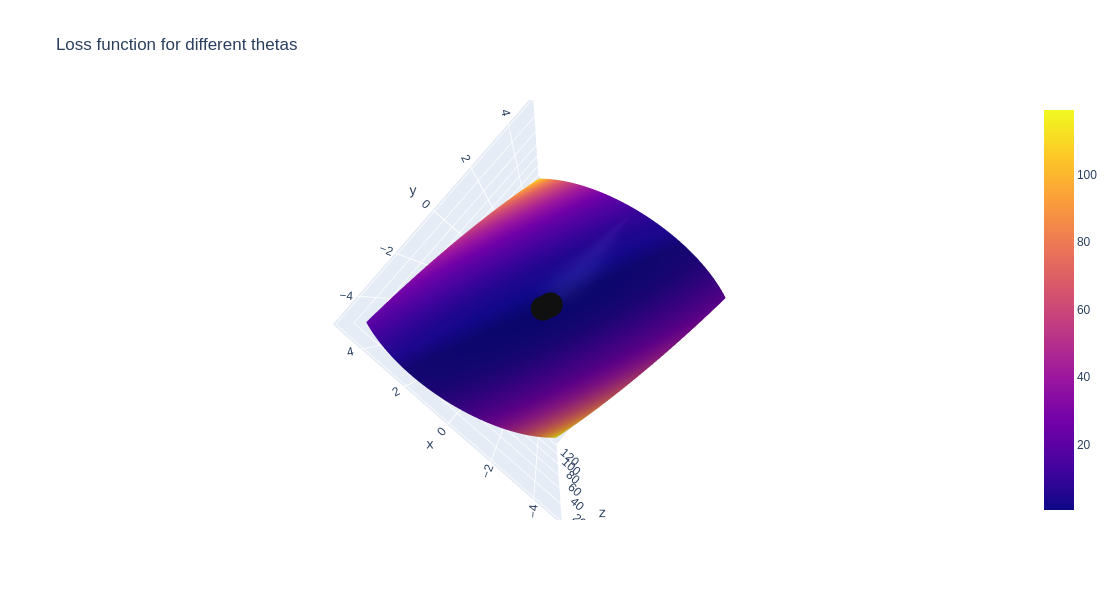

In [189]:
#Let's look at the loss path on the function

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

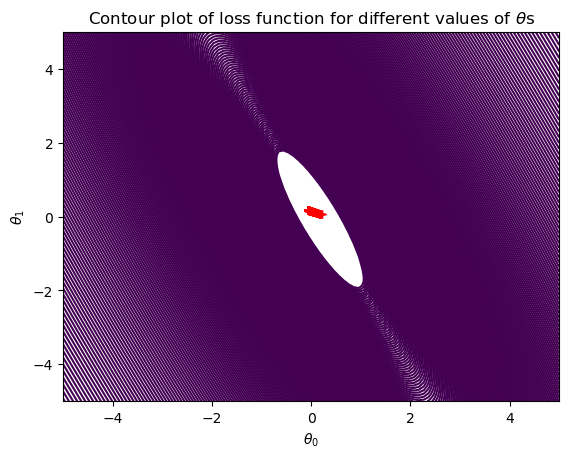

In [190]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()